<a href="https://colab.research.google.com/github/me-sam-coder/machine-learning/blob/main/chitta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# libraries
import os
import pathlib
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers, layers, Model, optimizers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import seaborn as slf
from PIL import Image
import cv2
%matplotlib inline
np.random.seed(2)

In [ ]:
url = '/content/drive/MyDrive/dataset'
! unzip /content/drive/MyDrive/dataset/flowers.zip

Archive:  /content/drive/MyDrive/dataset/flowers.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflat

In [ ]:
size = (120, 120)
data = []
dir = "/content/flowers"
CATEGORIES = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
for category in CATEGORIES:
  path = os.path.join(dir, category)
  label = CATEGORIES.index(category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    if img_array is None:
        continue
    img_array = cv2.resize(img_array, dsize = size)
    data.append([img_array, label])

In [ ]:
X = []
y = []
for features, labels in data:
    X.append(features)
    y.append(labels)
X = np.array(X, dtype = np.float32)
y = np.array(y)

In [ ]:
print(X.shape)
print(y.shape)

(4317, 120, 120, 3)
(4317,)


In [ ]:
X = X/255

In [ ]:
X_train = X[:-100]
X_test = X[-100:]
y_train = y[:-100]
y_test = y[-100:]
print(X_train.shape)

(4217, 120, 120, 3)


In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu', input_shape = (120, 120, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(198, kernel_size = (1, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(198, kernel_size = (1, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))

In [ ]:
model.compile(loss = 'SparseCategoricalCrossentropy', optimizer = 'Adam', metrics = ['Accuracy'])

In [ ]:
model.fit(X, y, batch_size = 128, epochs = 50, verbose = 1, validation_data = (X_test, y_test))

Epoch 1/50
34/34 [==============================] - 40s 270ms/step - loss: 1.4431 - Accuracy: 0.3537 - val_loss: 1.0907 - val_Accuracy: 0.6400
Epoch 2/50
34/34 [==============================] - 6s 187ms/step - loss: 1.1614 - Accuracy: 0.4936 - val_loss: 1.2720 - val_Accuracy: 0.4100
Epoch 3/50
34/34 [==============================] - 6s 187ms/step - loss: 1.0286 - Accuracy: 0.5703 - val_loss: 1.1370 - val_Accuracy: 0.4800
Epoch 4/50
34/34 [==============================] - 6s 188ms/step - loss: 0.9561 - Accuracy: 0.6134 - val_loss: 0.9192 - val_Accuracy: 0.6900
Epoch 5/50
34/34 [==============================] - 6s 186ms/step - loss: 0.8799 - Accuracy: 0.6477 - val_loss: 1.0758 - val_Accuracy: 0.5200
Epoch 6/50
34/34 [==============================] - 6s 187ms/step - loss: 0.8488 - Accuracy: 0.6706 - val_loss: 0.9918 - val_Accuracy: 0.5400
Epoch 7/50
34/34 [==============================] - 6s 185ms/step - loss: 0.7888 - Accuracy: 0.6970 - val_loss: 0.6162 - val_Accuracy: 0.8000
Epoch

In [ ]:
score = model.evaluate(X_test, y_test)

4/4 [==============================] - 1s 63ms/step - loss: 7.5569e-04 - Accuracy: 1.0000


In [26]:
print(score[0])

0.0007556852069683373


In [27]:
print(score[1])

1.0


In [28]:
pred = model.predict(X_test)

In [34]:
!mkdir -p saved_model
model.save('/content/drive/MyDrive/dataset/saved_model/my_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/dataset/saved_model/my_model/assets


4
4
4
4
4


IndexError: ignored

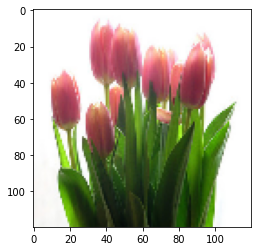

In [44]:
for i in range(0, 101):
  plt.imshow(X_test[i])
  print(pred[i])

In [ ]:
for i in range(0, 101):
  plt.imshow(X_test[i], pred[i])